# Taller 1 - ciencia de Datos Aplicada

Juan Felipe Palacios - 201616389

## Librerias

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
import urllib

## Punto 1
Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad de datos y procesos de limpieza que deba implementar.



### Lectura del archivo con los datos

#### Intetar leer el archivo

In [622]:
# Se leen los datos
# df_spotify = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Taller_1/data/Data_Taller_1.csv')

Para ignorar este error se usa "error_bad_lines=False" y para conocer el error -> "warn_bad_lines=True"


In [623]:
# df_spotify = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Taller_1/data/Data_Taller_1.csv',error_bad_lines=False, warn_bad_lines=True)

Para arreglar este error se utiliza el parámetro de *quoting=3* para que el reader no ponga comillas y agregamos más columnas. Por otra parte, se utiliza el parámetro *skipinitialspace* para quitar espacios entre comas.

In [624]:
df_spotify = pd.read_csv('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Taller_1/data/Data_Taller_1.csv',names=range(23),quoting=3,skipinitialspace=True)
df_spotify.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,genre;,NaN,NaN,NaN,NaN,NaN
1,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,1.77e-05,0.355,0.894,95.053,pop;,NaN,NaN,NaN,NaN,NaN
2,"""blink-182",All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,0.0,0.612,0.684,148.726,"""""rock","pop"""""";",NaN,NaN,NaN,NaN
3,"""Faith Hill",Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,0.0,0.251,0.278,136.859,"""""pop","country"""""";",NaN,NaN,NaN,NaN
4,"""Bon Jovi",It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,1.35e-05,0.347,0.544,119.992,"""""rock","metal"""""";",NaN,NaN,NaN,NaN


Que encontramos con el anterior resultado:

1. Cuando una canción tiene más de un género, la línea en el archivo .csv empieza y termina en comillas.
2. Si tiene más de un género, los géneros se encierran con doble comilla ""género"".
3. El separador de líneas es ;
4. Hay artistas y canciones con coma en el nombre que para que la función de read los lea como solo una columna deberían estar encerrados en comillas. Para solucionar esto, el artista, la canción y los géneros no serán encerrados en comillas, pero se reemplazará ', ' por ';' para hacer más fácil el proceso.

#### Proceso de limpieza

In [625]:
new_file = []
data = urllib.request.urlopen('https://raw.githubusercontent.com/jufepalacios/Ciencia_Datos_Aplicada/main/Taller_1/data/Data_Taller_1.csv')

for line in data:
  line = line.decode('utf-8')
  line = line.replace(';','')
  line = line.replace('"','')
  line = line.replace(', ',';')
  new_file.append(line)

with open('./Data_Taller_1_new.csv','w') as file:
  for line in new_file:
    file.write(line)

Se procede a leer el nuevo archivo.

In [626]:
df_spotify = pd.read_csv('Data_Taller_1_new.csv')
df_spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock;pop
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop;country
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock;metal
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Ahora no hay problemas leyendo el archivo y se tiene toda la información en las columnas necesarias.

Se volverán a cambiar los ';' por ', '.

In [627]:
df_spotify.replace(regex=';',value=', ',inplace=True)
df_spotify.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Describir el conjunto de datos

#### Análisis general

Se utiliza la función info() para conocer las columnas, cuantos valores son no nulos por columnas y el tipo de variable.

In [628]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       1998 non-null   float64
 3   explicit          1999 non-null   object 
 4   year              2000 non-null   int64  
 5   popularity        1997 non-null   float64
 6   danceability      1997 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          1999 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       1999 non-null   float64
 12  acousticness      1997 non-null   float64
 13  instrumentalness  1999 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           1999 non-null   float64
 16  tempo             1998 non-null   float64


Los datos cuentan con las sigueintes columnas:


*   Artista: Nombre del artista (string).
*   Canción: Nombre de la canción (string).
*   Duración [ms]: Duración de la canción en milisegundos (float).
*   Explicit: Indicador de si la canción es explicita o no (string). Puede ser False o True.
*   Año: Año de la canción (int).
*   Popularidad: Índice de popularidad de la canción (float).
*   Bailabilidad: Índice de si la canción es bailable (float).
*   Energía: Porcentaje de energía de la canción (float).
*   Nota: Nota en la que se encuentra la canción (int).
*   Volumen: Volumen de la canción en decibeles (float).
*   Modo: Modalidad de la canción (int).
*   Speechiness: Índice de presencia de palabras habladas en la canción (float).
*   Acústica: Índice de si la canción es acústica (float).
*   Instrumentalidad: Índice de si la canción no contiene voces (float).
*   Vivacidad: Índice de si existe audiencia en la canción (float).
*   Valencia: Índice de que tan positiva es la canción (float).
*   Tempo: Índice estimado del tempo de la canción en beats por minuto (float).
*   Género: Género o géneros de la canción (string).

\\

Columnas con todos los datos:
*   artist, song, year, energy, key, mode, liveness







#### Calidad de datos

##### Eliminación de duplicados

In [629]:
df_spotify.shape

(2000, 18)

In [630]:
df_spotify = df_spotify.drop_duplicates()

In [631]:
df_spotify.shape

(1941, 18)

##### Columans string (artist, song, explicit, genre)

In [632]:
df_spotify['artist'].unique()

array(['Britney Spears', 'blink-182', 'Faith Hill', 'Bon Jovi', '*NSYNC',
       'Sisqo', 'Eminem', 'Robbie Williams', "Destiny's Child", 'Modjo',
       "Gigi D'Agostino", 'Eiffel 65', "Bomfunk MC's", 'Sting',
       'Melanie C', 'Aaliyah', 'Anastacia', 'Alice Deejay', 'Dr. Dre',
       'Linkin Park', 'Tom Jones', 'Sonique', 'M.O.P.', 'Limp Bizkit',
       'Darude', 'Da Brat', 'Moloko', 'Chicane', 'DMX', 'Debelah Morgan',
       'Madonna', 'Ruff Endz', 'Montell Jordan', 'Kylie Minogue', 'JAY-Z',
       'LeAnn Rimes', 'Avant', 'Enrique Iglesias', 'Toni Braxton',
       'Bow Wow', 'Missy Elliott', 'Backstreet Boys', 'Samantha Mumba',
       'Mýa', 'Mary Mary', 'Next', 'Janet Jackson', 'Ricky Martin',
       'Jagged Edge', 'Mariah Carey', 'Baha Men', 'Donell Jones', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Craig David', 'Christina Aguilera',
       'Red Hot Chili Peppers', 'Sammie', 'Santana', 'Kandi', 'Vengaboys',
       'Ronan Keating', 'Madison Avenue', 'Céline Dion', '3 Doors Down',
     

In [633]:
songs = df_spotify['song'].unique()
for song in songs:
  print(song)

Oops!...I Did It Again
All The Small Things
Breathe
It's My Life
Bye Bye Bye
Thong Song
The Real Slim Shady
Rock DJ
Say My Name
Lady - Hear Me Tonight
L'Amour Toujours
Move Your Body - Gabry Ponte Original Radio Edit
Freestyler
Desert Rose
Never Be The Same Again
Try Again
I'm Outta Love - Radio Edit
Better Off Alone
The Riddle
The Next Episode
In the End
Sexbomb
It Feels So Good
Cold as Ice
I Turn To You
Take A Look Around
Sandstorm
What'chu Like (feat. Tyrese)
The Time Is Now
Don't Give Up
Party Up
Dance with Me
Music
No More
Born to Make You Happy
Get It On Tonite
Spinning Around
Big Pimpin'
I Need You
Separated
Be With You
He Wasn't Man Enough
Bounce With Me (feat. Xscape) - Edited Album Version
Forgot About Dre
Hot Boyz
Show Me the Meaning of Being Lonely
Gotta Tell You
Case Of The Ex (Whatcha Gonna Do)
Shackles (Praise You)
Wifey
Doesn't Really Matter
She Bangs - English Version
He Can't Love U
Incomplete
I Just Wanna Love U (Give It 2 Me)
Thank God I Found You (feat. Joe & 98°)


In [634]:
df_spotify['explicit'].unique()

array([False, True, nan], dtype=object)

In [635]:
df_spotify['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

Existe un valor malo en la columna de género: set(), se cambiara por vacío.

In [636]:
df_spotify['genre'].replace(regex='set\(\)',value='',inplace=True)
df_spotify['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', '', 'hip hop, pop, latin',
       'hip hop, Dance/Electronic', 'hip hop, pop, rock',
       'World/Traditional, Folk/Acoustic', 'Folk/Acoustic, pop',
       'rock, easy listening', 'World/Traditional, hip hop',
       'hip hop, pop, R&B, latin', 'rock, blues',
       'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'country', '

##### Imputar strings vacios en NaN values de la columna genre

In [637]:
df_spotify['genre'].fillna('',inplace=True)

##### Columnas int (year, key, mode)

In [638]:
df_spotify['year'].unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

In [639]:
df_spotify['key'].unique()

array([ 1,  0,  7,  8,  2,  5,  6, 11,  3, 10,  9,  4])

In [640]:
df_spotify['mode'].unique()

array([0, 1])

##### Columnas float (duration_ms, popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo)

Todas las columnas parecen no tener outliers.

###### Duration_ms

In [641]:
df_spotify['duration_ms'].describe()

count      1939.000000
mean     228591.004642
std       39269.827421
min      113000.000000
25%      203499.500000
50%      223133.000000
75%      248006.000000
max      484146.000000
Name: duration_ms, dtype: float64

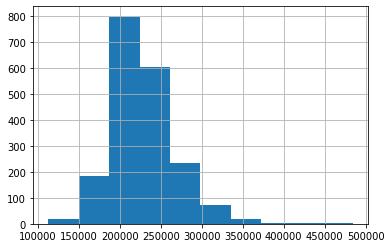

In [642]:
df_spotify['duration_ms'].hist()

###### Popularity

In [643]:
df_spotify['popularity'].describe()

count    1938.000000
mean       59.619195
std        21.514507
min         0.000000
25%        56.000000
50%        65.000000
75%        73.000000
max        89.000000
Name: popularity, dtype: float64

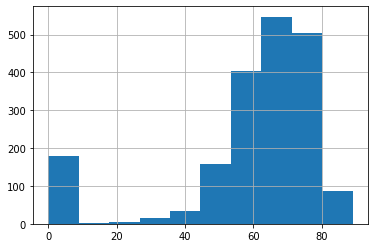

In [644]:
df_spotify['popularity'].hist()

###### Danceability

In [645]:
df_spotify['danceability'].describe()

count    1938.000000
mean        0.667738
std         0.140676
min         0.129000
25%         0.581000
50%         0.676000
75%         0.765000
max         0.975000
Name: danceability, dtype: float64

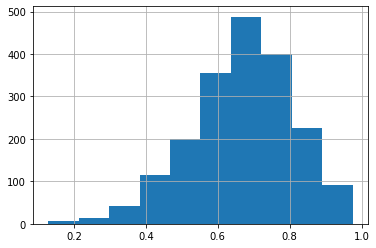

In [646]:
df_spotify['danceability'].hist()

###### Energy

In [647]:
df_spotify['energy'].describe()

count    1941.000000
mean        0.721549
std         0.152872
min         0.054900
25%         0.624000
50%         0.739000
75%         0.840000
max         0.999000
Name: energy, dtype: float64

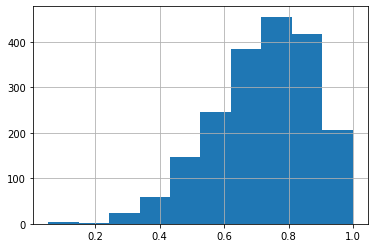

In [648]:
df_spotify['energy'].hist()

###### Loudness

In [649]:
df_spotify['loudness'].describe()

count    1940.000000
mean       -5.513547
std         1.939307
min       -20.514000
25%        -6.488500
50%        -5.284500
75%        -4.168000
max        -0.276000
Name: loudness, dtype: float64

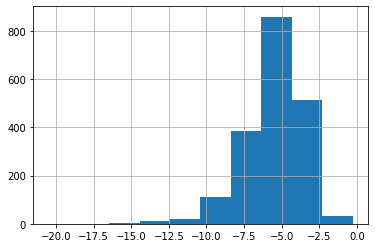

In [650]:
df_spotify['loudness'].hist()

###### Speechiness

In [651]:
df_spotify['speechiness'].describe()

count    1940.000000
mean        0.103821
std         0.096158
min         0.023200
25%         0.039700
50%         0.061000
75%         0.129000
max         0.576000
Name: speechiness, dtype: float64

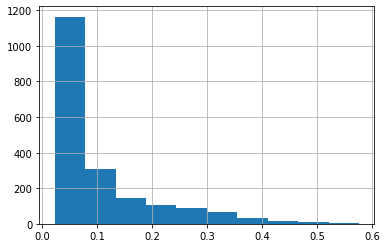

In [652]:
df_spotify['speechiness'].hist()

###### Acousticness

In [653]:
df_spotify['acousticness'].describe()

count    1938.000000
mean        0.128328
std         0.172672
min         0.000019
25%         0.013500
50%         0.055850
75%         0.176000
max         0.976000
Name: acousticness, dtype: float64

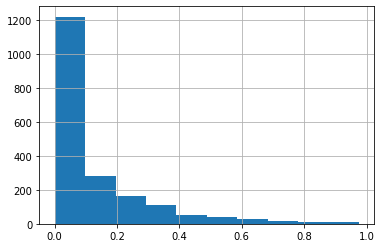

In [654]:
df_spotify['acousticness'].hist()

###### Instrumentalness

In [655]:
df_spotify['instrumentalness'].describe()

count    1940.000000
mean        0.015380
std         0.088393
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000069
max         0.985000
Name: instrumentalness, dtype: float64

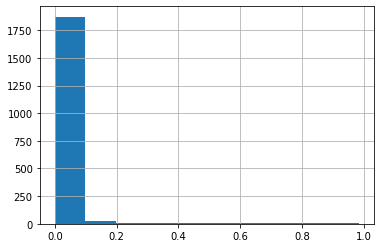

In [656]:
df_spotify['instrumentalness'].hist()

###### Liveness

In [657]:
df_spotify['liveness'].describe()

count    1941.000000
mean        0.181726
std         0.140910
min         0.021500
25%         0.088400
50%         0.124000
75%         0.242000
max         0.853000
Name: liveness, dtype: float64

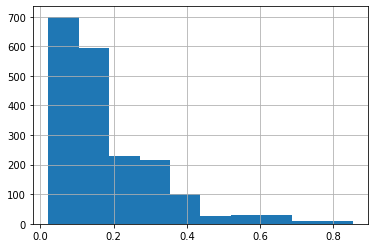

In [658]:
df_spotify['liveness'].hist()

###### Valence

In [659]:
df_spotify['valence'].describe()

count    1940.000000
mean        0.553000
std         0.220897
min         0.038100
25%         0.389750
50%         0.560000
75%         0.731000
max         0.973000
Name: valence, dtype: float64

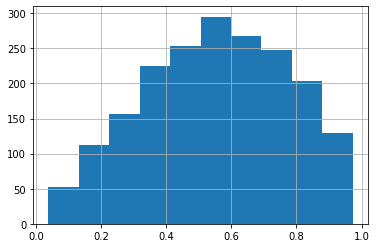

In [660]:
df_spotify['valence'].hist()

###### Tempo

In [661]:
df_spotify['tempo'].describe()

count    1939.000000
mean      120.138921
std        26.965241
min        60.019000
25%        98.987500
50%       120.028000
75%       134.184500
max       210.851000
Name: tempo, dtype: float64

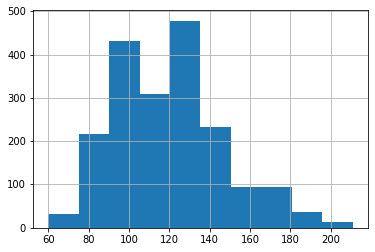

In [662]:
df_spotify['tempo'].hist()

## Punto 1.1

¿Cuál es el top 10 de artistas más activos de los últimos 10 años?


Como se tiene información desde el 2020, cuando hace referencia a los últimos 10 años se toman canciones desde el 2010 hasta el 2022. Para encontrar el top 10 de artistas más activos se procede a hacer un groupby por artista y se utiliza la función $count()$ para encontrar la cantidad de veces que esta el mismo artista en data frame.

In [663]:
(max(df_spotify['year'])-10)

2010

In [664]:
df_spotify_last_10_years = df_spotify[df_spotify['year']>=(max(df_spotify['year'])-10)]
df_artists = df_spotify_last_10_years.groupby(['artist']).count().sort_values(['song'],ascending=False).reset_index().head(10)
df_artists[['artist','song']]

,artist,song
0,Drake,22
1,David Guetta,18
2,Calvin Harris,18
3,Taylor Swift,14
4,Ariana Grande,13
5,Katy Perry,13
6,Jason Derulo,11
7,Maroon 5,11
8,Rihanna,11
9,Bruno Mars,11


Para visualizar se utiliza la función $bar()$ de pandas.

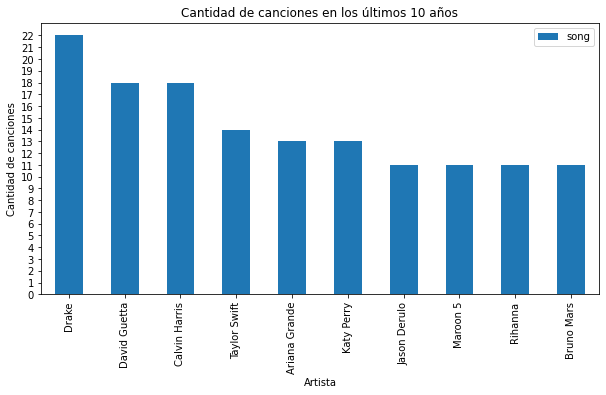

In [665]:
df_artists.plot.bar(x='artist',y='song',figsize=(10,5),title='Cantidad de canciones en los últimos 10 años',xlabel='Artista',ylabel='Cantidad de canciones',yticks=range(23))

## Punto 2

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? Halle la diferencia del tiempo promedio de ambos géneros.


|Requerimiento|columna|
|---|---|
|géneros|genre|
|duración|duration_ms|

Primero se filtra por las canciones que contengan en su género la palabra 'latin' y la palabra 'Folk/Acoustic'. Estos datos se guardan en nuevos data frames.

In [666]:
df_songs_latin = df_spotify[df_spotify['genre'].str.contains('latin')==True]
df_songs_folk = df_spotify[df_spotify['genre'].str.contains('Folk/Acoustic')==True]
print(df_songs_latin.shape,df_songs_folk.shape)

(63, 18) (20, 18)


Existen 63 canciones con género Latin y 20 canciones con género Folk/Acoustic. Se calcula el promedio de la duración de todas las canciones con la función $mean()$ y se calcula la diferencia restando una variable con la otra.

In [667]:
latin_dur = df_songs_latin['duration_ms'].mean()
folk_dur = df_songs_folk['duration_ms'].mean()
dif_tiempo = latin_dur-folk_dur
print('Duración promedio de las canciones con género Latin: {} [ms]'.format(latin_dur))
print('Duración promedio de las canciones con género Folk/Acoustic: {} [ms]'.format(folk_dur))
print('Diferencia de duración: {} [ms]'.format(dif_tiempo))
print('Diferencia de duración: {} [s]'.format(dif_tiempo*(1/(1000*60))))

Duración promedio de las canciones con género Latin: 227494.68253968254 [ms]
Duración promedio de las canciones con género Folk/Acoustic: 220183.65 [ms]
Diferencia de duración: 7311.03253968255 [ms]
Diferencia de duración: 0.1218505423280425 [s]


La diferencia entre el tiempo promedio de las canciones de Latin y Folk/Acoustic es de $7311.03$ milisegundos o $0.1219$ minutos.

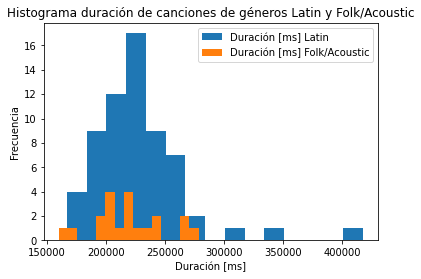

In [668]:
ax = df_songs_latin.plot.hist(x='song',y='duration_ms',bins=15)
ay = df_songs_folk.plot.hist(x='song',y='duration_ms',bins=15,ax=ax)
ay.set_xlabel('Duración [ms]')
ay.set_ylabel('Frecuencia')
ay.set_title('Histograma duración de canciones de géneros Latin y Folk/Acoustic')
ay.legend(['Duración [ms] Latin','Duración [ms] Folk/Acoustic'])
ay

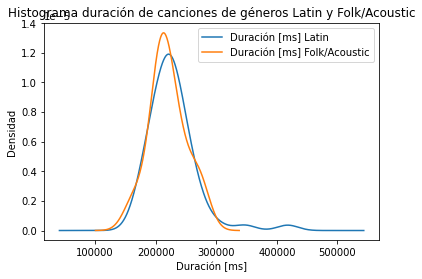

In [669]:
ax = df_songs_latin.plot.kde(x='song',y='duration_ms')
ay = df_songs_folk.plot.kde(x='song',y='duration_ms',ax=ax)
ay.set_xlabel('Duración [ms]')
ay.set_ylabel('Densidad')
ay.set_title('Histograma duración de canciones de géneros Latin y Folk/Acoustic')
ay.legend(['Duración [ms] Latin','Duración [ms] Folk/Acoustic'])
ay

De las gráficas se puede observar que la duración media de las canciones con género Latin es más alta que la de las canciones de Folk/Acoustic. 

## Punto 3

Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

|Requerimiento|columna|
|---|---|
|géneros|genre|
|cantidad de canciones|song|
|2019|year|

Primeramente, se seleccionan solo las canciones en el año 2019 y se crea un diccionario y una función para contar la cantidad de veces que aparece un género. Si una canción tiene varios géneros se toman por separado.

In [670]:
df_2019 = df_spotify[df_spotify['year']==2019]

In [671]:
def top_genre(col_genre):
  dict_genre = {}
  for genre in col_genre:
    if ', ' in genre:
      genres = genre.split(', ')
      for genre_sub in genres:
        if genre_sub in dict_genre:
          dict_genre[genre_sub] += 1
        else:
          dict_genre[genre_sub] = 1
    elif genre:
      if genre in dict_genre:
        dict_genre[genre] += 1
      else:
        dict_genre[genre] = 1
  return dict_genre

In [672]:
dict_genres_2019 = top_genre(df_2019['genre'])

dict_genres_2019 = dict(sorted(dict_genres_2019.items(), key=lambda item: item[1], reverse=True))

dict_genres_2019

{'pop': 63,
 'hip hop': 38,
 'Dance/Electronic': 21,
 'R&B': 9,
 'latin': 8,
 'rock': 2,
 'metal': 2,
 'country': 1}

El top 5 de géneros en el 2019 es:

*   Pop, con 63 canciones
*   Hip Hop, con 38 canciones
*   Dance/Electronic, con 21 canciones
*   R&B, con 9 canciones
*   Latin, con 8 canciones



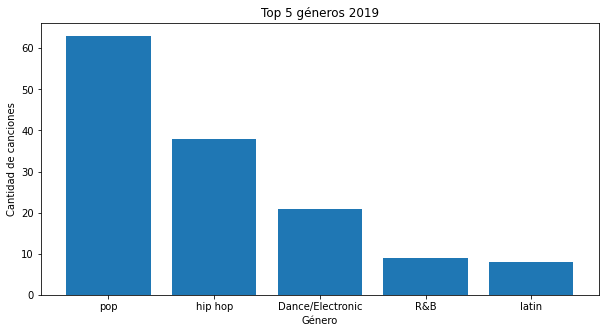

In [673]:
plt.figure(1,figsize=(10,5))
plt.xlabel('Género')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 géneros 2019')
y = list(dict_genres_2019.values())[:6]
plt.bar(range(5),list(dict_genres_2019.values())[:5])
plt.xticks(range(5),list(dict_genres_2019.keys())[:5])
plt.show()

Para encontrar la cantidad de canciones de cada género del top 5, se utiliza la función creada anteriormente para los años a estudiar. La información se guarda en una lista de diccionarios. Después, se procede a guardar cada número de canciones en otro diccionario por género.
Finalmente, se grafican la cantidad de canciones respecto al año.

In [674]:
top_5_generos = list(dict_genres_2019.keys())[:5]
print(top_5_generos)

['pop', 'hip hop', 'Dance/Electronic', 'R&B', 'latin']


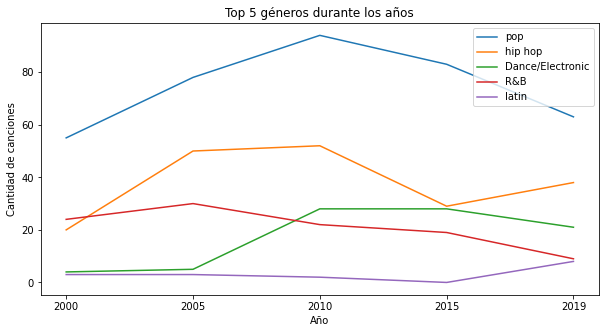

In [675]:
anios = ['2000', '2005', '2010', '2015', '2019']
top_5_generos = list(dict_genres_2019.keys())[:5]

list_dicts_generes = []

for anio in anios:
  df = df_spotify[df_spotify['year']==int(anio)]
  dict_genres = top_genre(df['genre'])
  dict_genres = dict(sorted(dict_genres.items(), key=lambda item: item[1], reverse=True))
  for key in list(dict_genres.keys()):
      if key not in top_5_generos:
         del dict_genres[key]
  list_dicts_generes.append(dict_genres)

num_songs_genre = {i:[] for i in top_5_generos}

for dict_genre in list_dicts_generes:
  if len(dict_genre) < 5:
    for genre in top_5_generos:
      if genre not in dict_genre:
        dict_genre[genre] = 0
  for key in dict_genre.keys():
    num_songs_genre[key].append(dict_genre[key])

plt.figure(2,figsize=(10,5))
for genre in num_songs_genre:
  plt.plot(anios,num_songs_genre[genre])
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 géneros durante los años')
plt.legend(num_songs_genre.keys())
plt.show()

## Punto 4

¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.


|Requerimiento|columna|
|---|---|
|Año de aparición|year|
|Nuevo Artista|artist|

Para este punto se sacará una lista de artistas por año y se definirá un diccionario con la cantidad de artistas nuevos por años. Para calcular si un artista es nuevo se verifica que no esté en la lista de artistas del año anterior. Y en cada año se agrega el artista del año anterior para tener un acumulado de artistas. Finalmente, se grafican la cantidad de artistas nuevo por año.

In [676]:
from ast import Pass
anios = sorted(df_spotify['year'].unique())

artistas_per_anio = []
dict_nuevos_artistas = {i:0 for i in anios}

count = 0
for anio in anios:
  if count == 0:
    list_artistas = list(df_spotify[df_spotify['year']==int(anio)]['artist'].unique())
    artistas_per_anio.append(list_artistas)
  else:
    list_artistas = list(df_spotify[df_spotify['year']==int(anio)]['artist'].unique())
    list_artistas = artistas_per_anio[count-1] + list_artistas
    list_artistas = list(set(list_artistas))
    artistas_per_anio.append(list_artistas)
  count += 1

count = 0
for artistas in artistas_per_anio:
  if count == 0:
    dict_nuevos_artistas[anios[count]] = len(artistas)
  else:
    for artista in artistas:
      if artista not in artistas_per_anio[count-1]:
        dict_nuevos_artistas[anios[count]] += 1
  count += 1

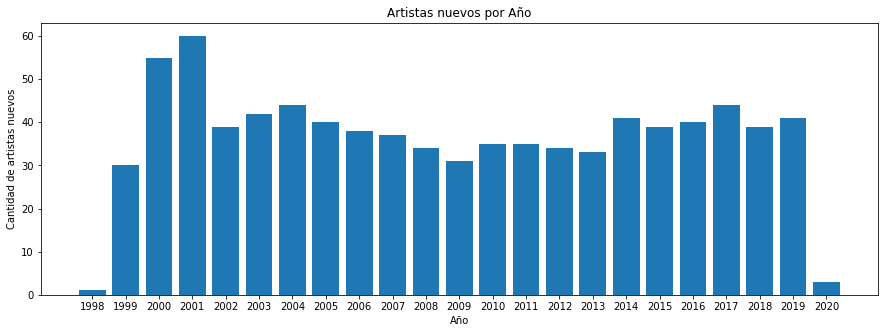

In [677]:
plt.figure(3,figsize=(15,5))
plt.xlabel('Año')
plt.ylabel('Cantidad de artistas nuevos')
plt.title('Artistas nuevos por Año')
y = list(dict_nuevos_artistas.values())[:6]
plt.bar(range(len(dict_nuevos_artistas)),list(dict_nuevos_artistas.values()))
plt.xticks(range(len(dict_nuevos_artistas)),list(dict_nuevos_artistas.keys()))
plt.show()

## Punto 5

Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

|Requerimiento|columna|
|---|---|
|popularidad promedio|popularity.mean()|
|por género|genre|
|por año|year|

Para encontrar la popularidad promedio por año se utiliza la función $groupby()$ para agrupar por año y la función $mean()$ para encontrar el promedio de la popularidad para esos años.

In [678]:
df_popularidad_por_anio = df_spotify.groupby('year').mean().reset_index()
df_popularidad_por_anio = df_popularidad_por_anio[['year','popularity']]
df_popularidad_por_anio

,year,popularity
0,1998,49.000000
1,1999,64.921053
2,2000,58.142857
3,2001,59.349057
4,2002,62.104651
5,2003,58.758242
6,2004,58.631579
7,2005,61.663366
8,2006,57.161290
9,2007,59.477778


Como una canción puede tener más de un género, se tiene que hacer otro tipo de procedimiento. Primero, se convierten en listas la columna de género para poder hacer uso de la función $explode()$ y tener la misma fila con los diferentes géneros. Después, se hace el $groupby()$ en el género y con la función $mean()$ se tiene el promedio de la popularidad.

In [679]:
df_spotify_genres = df_spotify.copy()
df_spotify_genres['genre'] = df_spotify_genres['genre'].str.split(', ')
df_spotify_genres = df_spotify_genres.explode('genre')
df_popularidad_por_genero = df_spotify_genres.groupby('genre').mean().reset_index()
df_popularidad_por_genero[['genre','popularity']]

,genre,popularity
0,,57.565217
1,Dance/Electronic,54.569921
2,Folk/Acoustic,60.200000
3,R&B,58.569794
4,World/Traditional,53.800000
5,blues,45.500000
6,classical,63.000000
7,country,56.200000
8,easy listening,61.428571
9,hip hop,61.811749


Como en la columna de género existía valores vacíos, se procede a eliminar esa fila para el resultado obtenido.

In [680]:
df_popularidad_por_genero.drop(0,inplace=True)
df_popularidad_por_genero = df_popularidad_por_genero[['genre','popularity']].sort_values('popularity',ascending=False)
df_popularidad_por_genero

,genre,popularity
12,metal,67.671875
6,classical,63.000000
14,rock,62.638393
9,hip hop,61.811749
8,easy listening,61.428571
2,Folk/Acoustic,60.200000
13,pop,59.021533
11,latin,58.758065
3,R&B,58.569794
10,jazz,57.500000


Se procede a graficar los resultados obtenidos.

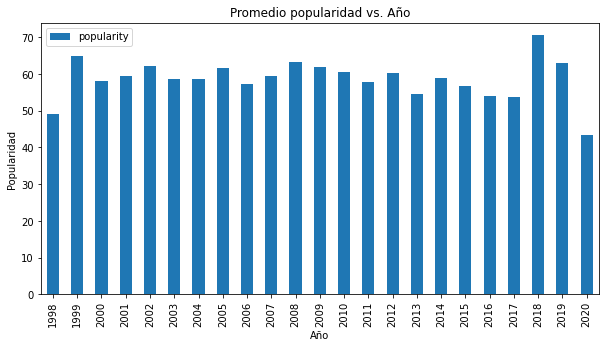

In [681]:
df_popularidad_por_anio.plot.bar(x='year',y='popularity',figsize=(10,5),xlabel='Año',ylabel='Popularidad',title='Promedio popularidad vs. Año')

De la gráfica de años no se encuentra ninguna tendencia. La popularidad se mantuvo en un valor casi constante entre el año 2000 y 2017. Las canciones del 2018 alcanzaron mayo popularidad que antes. Y la popularidad de las canciones decreció para el 2020 drásticamente.

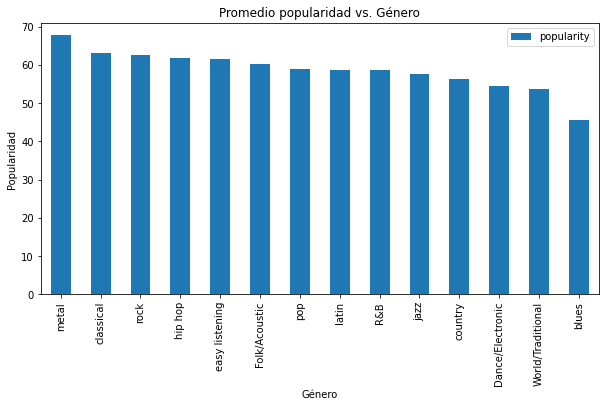

In [682]:
df_popularidad_por_genero.plot.bar(x='genre',y='popularity',figsize=(10,5),xlabel='Género',ylabel='Popularidad',title='Promedio popularidad vs. Género')

De esta gráfica se puede concluir que el género con mayor popularidad es el metal y el menos popular es el Blues. Esto puede ser relativo de acuerdo con la cantidad de canciones que presenten por género. Es decir, si solo se tiene una canción de Metal con una popularidad alta, ese valor será su promedio. Sin embargo, géneros como el Pop y el Hip Hop que tiene gran cantidad de canciones en los datos su valor de popularidad puede variar bastante.

## Punto 6

Compare los géneros Pop y Rock según sus características de: energy, valence y tempo. Concluya sobre su análisis.


|Requerimiento|columna|
|---|---|
|Géneros Pop y Rock|genre|
|Energy|energy|
|Valence|valence|
|Tempo|tempo|

Primero se extraen los datos para las canciones que tengan el género de Pop y Rock. Existen canciones con pop y rock en su género, estas canciones no se tendrán en cuenta para ninguno de los dos casos.

In [683]:
df_pop_songs = df_spotify[(df_spotify['genre'].str.contains('pop')==True) & (df_spotify['genre'].str.contains('rock')==False)]
df_rock_songs = df_spotify[(df_spotify['genre'].str.contains('rock')==True) & (df_spotify['genre'].str.contains('pop')==False)]
print(df_pop_songs.shape,df_rock_songs.shape)

(1461, 18) (103, 18)


Existen 1461 canciones de pop que no son rock y 103 canciones de rock que no son pop.

In [684]:
print(df_pop_songs['energy'].describe(),'\n')
print(df_rock_songs['energy'].describe(),'\n')

count    1461.000000
mean        0.712072
std         0.151423
min         0.054900
25%         0.613000
50%         0.727000
75%         0.828000
max         0.999000
Name: energy, dtype: float64 

count    103.000000
mean       0.825204
std        0.126351
min        0.396000
25%        0.764500
50%        0.860000
75%        0.917000
max        0.988000
Name: energy, dtype: float64 



<Figure size 432x288 with 0 Axes>

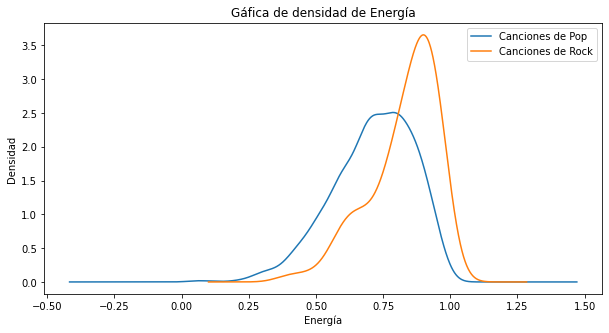

In [685]:
plt.figure(7)
ax = df_pop_songs.plot.kde(y='energy',figsize=(10,5))
ay = df_rock_songs.plot.kde(y='energy',ax=ax)
plt.xlabel('Energía')
plt.ylabel('Densidad')
plt.title('Gáfica de densidad de Energía')
plt.legend(['Canciones de Pop','Canciones de Rock'])
plt.show()

* Energy:
En términos de energía de las canciones de pop y rock, las canciones de rock tienen más energía que las de pop. Sin embargo, el máximo de energía de las canciones de pop es mayor que las de rock por lo que se concluye que existe una canción de pop es más energética que las de rock. Por otra parte, el mínimo de energía de las canciones de pop es mucho menor que las de rock, por lo que se concluye que las canciones de rock son más energéticas que las de pop. Finalmente, se puede decir que las canciones de pop son más dispersas en energía que las de rock.


In [686]:
print(df_pop_songs['valence'].describe(),'\n')
print(df_rock_songs['valence'].describe(),'\n')

count    1460.000000
mean        0.556722
std         0.219823
min         0.038100
25%         0.397000
50%         0.564500
75%         0.734250
max         0.973000
Name: valence, dtype: float64 

count    103.000000
mean       0.523111
std        0.189811
min        0.082400
25%        0.393000
50%        0.543000
75%        0.630000
max        0.932000
Name: valence, dtype: float64 



<Figure size 432x288 with 0 Axes>

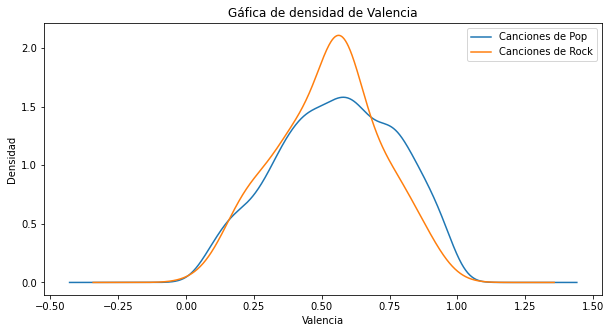

In [687]:
plt.figure(7)
ax = df_pop_songs.plot.kde(y='valence',figsize=(10,5))
ay = df_rock_songs.plot.kde(y='valence',ax=ax)
plt.xlabel('Valencia')
plt.ylabel('Densidad')
plt.title('Gáfica de densidad de Valencia')
plt.legend(['Canciones de Pop','Canciones de Rock'])
plt.show()

* Valence:
En el contexto de la positividad que transmiten las canciones de pop y rock, las de pop tienen un valor promedio mayor que las de rock, por lo que se puede decir que las canciones de pop ponen feliz a sus oyentes que las de rock. Al igual que la variable anterior, las canciones de pop tiene un valor de valencia mayor que las de rock, pero igualmente tienen un valor mucho más pequeño de valencia. Finalmente, los datos de valencia para las canciones de pop están mucho más dispersos que los de las canciones de rock.


In [688]:
print(df_pop_songs['tempo'].describe(),'\n')
print(df_rock_songs['tempo'].describe(),'\n')

count    1460.000000
mean      119.274524
std        26.385347
min        60.019000
25%        98.524500
50%       119.994500
75%       131.938250
max       210.851000
Name: tempo, dtype: float64 

count    103.000000
mean     127.213602
std       29.562507
min       74.989000
25%      103.342500
50%      123.091000
75%      151.030500
max      199.935000
Name: tempo, dtype: float64 



* Tempo:
Para la última variable de tempo se tiene que, las canciones de pop tienen en promedio menor tempo que las canciones de rock. Esto significa que, las canciones de rock tienen un ritmo más veloz que las del pop. Sin embargo, y ha ocurrido en las últimas dos mediciones, las canciones de pop tienen un valor de tempo máximo más grande que el de las canciones de rock y un valor mínimo mucho menor también. En este caso, los valores de tempo de las canciones de rock son mucho más dispersos que los de las canciones de pop, por lo que se dice que las canciones de pop tienen un rango más específico de tempo.


Es importante volver a mencionar la cantidad de datos para las dos variables. Se tienen aproximadamente 1400 registros para canciones de pop y solo 100 para rock, por lo que los datos obtenidos de las canciones de pop representan muchas más canciones que las de rock. Si se quisiera un análisis con mejor precisión debería tenerse un número casi igual de registros para las dos variables. Pero con lo obtenido es posible concluir ciertos aspectos respecto a las canciones de Pop y Rock.

## Punto 7

Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

Se desea conocer si se tiene alguna relación entre el año de la canción y la cantidad de canciones que son explicitas para ese año, y si dado que una canción es explicita es menos popular que las que no lo son.

|Requerimiento|columna|
|---|---|
|popularidad|popularity|
|año|year|
|canciones explicitas|explicit|

Primeramente, se realiza un $groupby()$ para agrupar las canciones por año y por si son explicitas o no, y la función $count()$ para conocer cuántos canciones hay por cada año que son explicitas y las que no.

In [689]:
df_anio_explicit = df_spotify.groupby(['year','explicit']).count()
df_anio_explicit = df_anio_explicit['song'].reset_index()
df_anio_explicit

,year,explicit,song
0,1998,True,1
1,1999,False,30
2,1999,True,8
3,2000,False,59
4,2000,True,12
5,2001,False,83
6,2001,True,23
7,2002,False,58
8,2002,True,28
9,2003,False,69


Se grafican solo la cantidad de canciones que son explicitas por años.

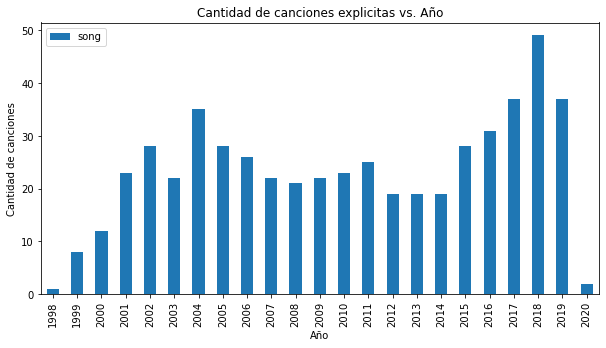

In [690]:
df_anio_explicit[df_anio_explicit['explicit']==True].plot.bar(x='year',y='song',figsize=(10,5))
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones explicitas vs. Año')
plt.show()

De esto podemos concluir que, al principio si existía tendencia de que entre más años pasaban, más canciones eran explicitas. Sin embargo, para el 2005 empezó a decrecer esta cantidad. En los años 2012, 2013 y 2014 se mantuvo constante el número de canciones explicitas por año. Nuevamente, para el año 2015 se aumentó el número de canciones explicitas, y llego a su máximo en el año 2018. Después de este año, el número volvió a decrecer. Se procede a calcular la correlación entre las dos variables.

In [691]:
df_explicitas = df_anio_explicit[df_anio_explicit['explicit']==True]
df_explicitas['year'].corr(df_explicitas['song']) #Se utiliza la columna song porque en ella se encuentra el conteo

0.408712800402122

Se tiene una correlación positiva, por lo que las variables si están relacionadas. Pero es un valor menor a $0.5$, por lo que una no tiene tanto efecto en la otra.

Para encontrar si la popularidad se ve afectada por si la canción es explicita o no, se procede a agrupar el data frame por la columna de 'explicit'. Se utiliza la función $mean()$ para conocer el valor promedio de la popularidad dado a si una canción es explícita o no.

In [695]:
df_explict = df_spotify.groupby('explicit').mean().reset_index()
df_explict[['explicit','popularity']]

,explicit,popularity
0,False,58.994290
1,True,61.261194


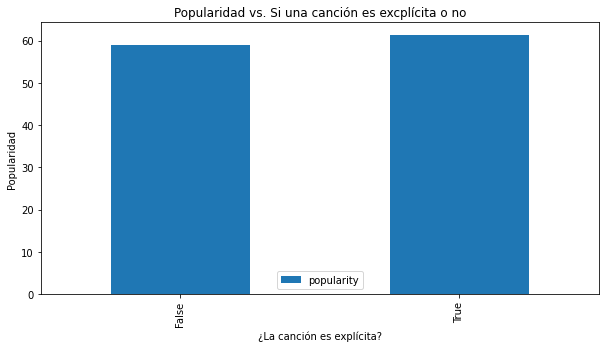

In [696]:
df_explict.plot.bar(x='explicit',y='popularity',figsize=(10,5))
plt.xlabel('¿La canción es explícita?')
plt.ylabel('Popularidad')
plt.title('Popularidad vs. Si una canción es excplícita o no')
plt.show()

De esto podemos concluir que las canciones explicitas son más populares que las que no los son. Sin embargo, los valores son bien cercanos, aproximadamente 59 y 61, por lo que también se puede decir que si una canción es explícita no afecta tanto la popularidad de esta.
